In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from arch import arch_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [17]:
# download data from Yahoo Finance
data = yf.download("GC=F", start = '2021-1-1', end = '2023-10-31')
data.to_csv('gold_prices_20210101_20231031.csv')

[*********************100%%**********************]  1 of 1 completed


In [18]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1912.199951,1945.099976,1912.199951,1944.699951,1944.699951,154
2021-01-05,1941.699951,1952.699951,1941.300049,1952.699951,1952.699951,113
2021-01-06,1952.000000,1959.900024,1901.500000,1906.900024,1906.900024,331
2021-01-07,1922.599976,1926.699951,1912.000000,1912.300049,1912.300049,122
2021-01-08,1908.000000,1908.000000,1834.099976,1834.099976,1834.099976,60
...,...,...,...,...,...,...
2023-10-24,1970.300049,1975.000000,1970.300049,1975.000000,1975.000000,10
2023-10-25,1971.199951,1985.300049,1971.199951,1984.099976,1984.099976,97
2023-10-26,1988.199951,1988.199951,1980.400024,1987.199951,1987.199951,521


In [58]:
# Remove rows with missing values
data_clean = data.dropna()

# Scale the 'Close' data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
data_clean['scaled_close'] = scaler.fit_transform(data_clean[['Close']])

# Split the data into a training set and a test set with a ratio of 0.9 to 0.1
train_data, test_data = train_test_split(data_clean, test_size=0.1, shuffle=False)



n = len(train_data)
n
data

/var/folders/b8/djnfc_v15770s0g45ydyl4vw0000gp/T/ipykernel_77910/2409467012.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['scaled_close'] = scaler.fit_transform(data_clean[['Close']])


,Open,High,Low,Close,Adj Close,Volume,daily_returns
Date,,,,,,,
2021-01-04,1912.199951,1945.099976,1912.199951,1944.699951,1944.699951,154,0.000000
2021-01-05,1941.699951,1952.699951,1941.300049,1952.699951,1952.699951,113,0.024891
2021-01-06,1952.000000,1959.900024,1901.500000,1906.900024,1906.900024,331,-0.139040
2021-01-07,1922.599976,1926.699951,1912.000000,1912.300049,1912.300049,122,0.019041
2021-01-08,1908.000000,1908.000000,1834.099976,1834.099976,1834.099976,60,-0.270588
...,...,...,...,...,...,...,...
2023-10-24,1970.300049,1975.000000,1970.300049,1975.000000,1975.000000,10,NaN
2023-10-25,1971.199951,1985.300049,1971.199951,1984.099976,1984.099976,97,NaN
2023-10-26,1988.199951,1988.199951,1980.400024,1987.199951,1987.199951,521,NaN


In [60]:
# Calculate daily returns
#data['daily_returns'] = data['scaled_close'].pct_change().fillna(0)

# Calculate rolling window variance (261 days)
window_size = 261
data['rolling_variance'] = data['daily_returns'].rolling(window=window_size).var()

# Annualize the variance
data['annualized_variance'] = data['rolling_variance'] * window_size

# Drop NaN values that are a result of the rolling window
data = data.dropna().reset_index(drop=True)

data


,Open,High,Low,Close,Adj Close,Volume,daily_returns,rolling_variance,annualized_variance
0,1819.800049,1823.000000,1815.400024,1821.199951,1821.199951,40,-0.029426,0.012540,3.272893
1,1821.500000,1822.000000,1816.500000,1816.500000,1816.500000,816,-0.023749,0.012543,3.273658
2,1816.800049,1820.099976,1812.300049,1812.300049,1812.300049,900,-0.021739,0.012544,3.273889
3,1817.400024,1843.099976,1817.400024,1843.099976,1843.099976,4,0.162963,0.012561,3.278396
4,1840.599976,1843.000000,1838.199951,1842.500000,1842.500000,20,-0.002730,0.012560,3.278261
...,...,...,...,...,...,...,...,...,...
171,1659.699951,1659.699951,1659.699951,1659.699951,1659.699951,2830,-0.151515,0.009262,2.417449
172,1665.500000,1680.099976,1664.599976,1664.599976,1664.599976,2337,0.134616,0.009330,2.435020
173,1668.300049,1670.800049,1668.300049,1670.800049,1670.800049,973,0.150123,0.009410,2.456114
174,1667.000000,1667.000000,1645.300049,1645.300049,1645.300049,1224,-0.536842,0.010507,2.742336


In [62]:
from statsmodels.stats.diagnostic import het_arch

# Perform the ARCH effect test
arch_test = het_arch(data['daily_returns'][:n].values, maxlag=1)

# Output the results of the ARCH effect test
arch_test_result = {
    "Test Statistic": arch_test[0],
    "P-Value": arch_test[1],
    "F-Statistic": arch_test[2],
    "F-Test P-Value": arch_test[3]
}

arch_test_result

/var/folders/b8/djnfc_v15770s0g45ydyl4vw0000gp/T/ipykernel_77910/933864986.py:4: FutureWarning: the 'maxlag'' keyword is deprecated, use 'nlags' instead.
  arch_test = het_arch(data['daily_returns'][:n].values, maxlag=1)


{'Test Statistic': 92.06213664292952,
 'P-Value': 8.399721504183742e-22,
 'F-Statistic': 192.03231183636524,
 'F-Test P-Value': 7.394172855198902e-30}

**Given the very small P-Value, we can reject the null hypothesis that there are no ARCH effects present in the data. This indicates that there is significant evidence of ARCH effects, suggesting that the variance of the series is not constant over time and can be modeled using a GARCH model.**



In [73]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA model to the squared returns as a proxy for GARCH(1,1)
arma_model = ARIMA(data['daily_returns'][0:n]**2, order=(1, 0, 1))
arma_result = arma_model.fit()

# Display the summary of the ARMA model fit
arma_result.summary()

/Users/apple/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          daily_returns   No. Observations:                  176
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 245.121
Date:                Wed, 08 Nov 2023   AIC                           -482.241
Time:                        21:31:37   BIC                           -469.559
Sample:                             0   HQIC                          -477.097
                                - 176                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1874      0.347      0.540      0.589      -0.493       0.868
ar.L1          0.9717      0.056     17.375      0.000       0.862       1.081
ma.L1          0.4073      0.053      7.640      0.000       0.303       0.512
sigma2         0.0035      0.000     26.946      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):             30246.49
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):              55.05   Skew:                             6.25
Prob(H) (two-sided):                  0.00   Kurtosis:                        65.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**The ARMA model summary provides the following coefficients and statistics:
The coefficient for AR(1) is 0.9717, which is close to 1, suggesting a strong autoregressive component in the volatility.
The coefficient for MA(1) is 0.4073 indicating a significant moving average component as well.
The P-values for both AR and MA terms are less than 0.05, which means they are statistically significant.
The Ljung-Box test and the Jarque-Bera test indicate that the residuals may not be normally distributed, which is common in financial time series due to the heavy tails and skewness in the distribution of returns.**

In [64]:
from sklearn.metrics import mean_squared_error

# Get the in-sample predictions
predictions = arma_result.predict()

# Calculate the RMSE for the predictions
rmse = np.sqrt(mean_squared_error(data['daily_returns'][0:n]**2, predictions))

# Output the RMSE
rmse

0.061064926465927385

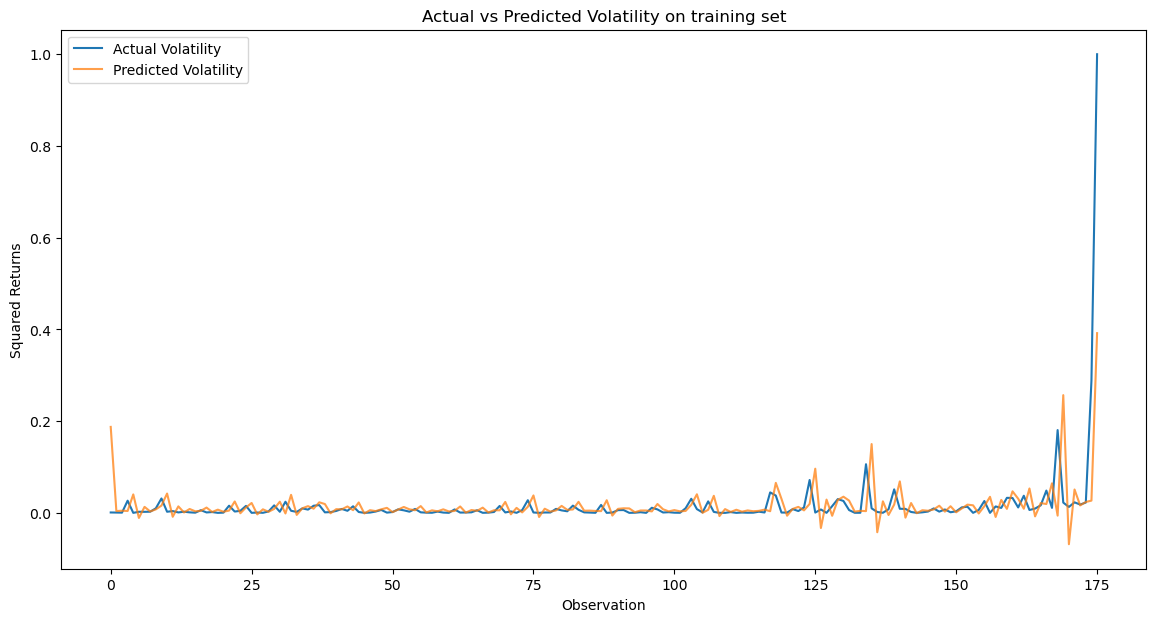

In [76]:
# Plot the actual versus predicted squared returns on training set
plt.figure(figsize=(14, 7))
plt.plot(data['daily_returns']**2, label='Actual Volatility')
plt.plot(predictions, label='Predicted Volatility', alpha=0.75)
plt.title('Actual vs Predicted Volatility on training set')
plt.xlabel('Observation')
plt.ylabel('Squared Returns')
plt.legend()
plt.show()

In [80]:
valid = data['daily_returns']**2
valid['predictions'] = predictions

In [82]:
data['daily_returns']**2

0      0.000866
1      0.000564
2      0.000473
3      0.026557
4      0.000007
         ...   
171    0.022957
172    0.018122
173    0.022537
174    0.288199
175    1.000000
Name: daily_returns, Length: 176, dtype: float64

In [66]:
predictions

0      0.187449
1      0.003983
2      0.004659
3      0.004103
4      0.040227
         ...   
171    0.050967
172    0.016208
173    0.023698
174    0.026736
175    0.391848
Name: predicted_mean, Length: 176, dtype: float64